In [1]:
from IPython.display import Image
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import heapq

In [2]:
df = pd.read_csv('data/단속장소_numbering_2.csv',encoding='cp949')
df.drop('Unnamed: 0', axis=1, inplace = True)

In [3]:
df['단속장소'].value_counts()

서울특별시 양천구 목동 901                2
서울특별시 양천구 목동 성원아파트              2
서울특별시 양천구 신월3동 신원초교             1
서울특별시 양천구 신정동 331-2             1
서울특별시 양천구 신정동 우성아파트             1
                               ..
서울특별시 양천구 신월동 아이파크위브아파트         1
서울특별시 양천구 신월6동 신곡시장(백십자약국)      1
서울특별시 양천구 신월동 서울 양천구 신월동 630    1
서울특별시 양천구 신정동 서남병원              1
서울특별시 양천구 목2동 어바니엘              1
Name: 단속장소, Length: 138, dtype: int64

In [4]:
df[df['단속장소']== '서울특별시 양천구 목2동 어바니엘']

,단속장소,X,Y,단속건수,number,dis,xy
139,서울특별시 양천구 목2동 어바니엘,126.874772,37.546796,71,139,1218.361231,"(126.874772, 37.54679641)"


In [5]:
from sklearn.preprocessing import LabelEncoder
import re

In [6]:
df['단속장소'].str[10:13].value_counts()

신정동    51
신월동    41
목동     32
목5동     4
신월3     3
신정4     2
신월6     1
신정1     1
목1동     1
목4동     1
목3동     1
신정3     1
목2동     1
Name: 단속장소, dtype: int64

In [7]:
df['label'] = 0

In [8]:
df['단속장소'].str[10:13]

0      신월3
1      신월동
2      신월동
3      신월동
4      신월동
      ... 
135    목3동
136    목동 
137    목동 
138    신정3
139    목2동
Name: 단속장소, Length: 140, dtype: object

# 행정위치 레이블 하기

In [9]:
# 신정동, 신정4동, 신정1동, 신정3동, label = 1 
df.loc[(df['단속장소'].str[10:13] == '신정동') | (df['단속장소'].str[10:13] == '신정4')
       | (df['단속장소'].str[10:13] == '신정1') | (df['단속장소'].str[10:13] == '신정3'),'label'] = 1

In [10]:
# 신월동, 신월3, 신월6, label = 2
df.loc[(df['단속장소'].str[10:13] == '신월동') | (df['단속장소'].str[10:13] == '신월3')
       | (df['단속장소'].str[10:13] == '신월6'),'label'] = 2

In [11]:
# 목동, 목5동, 목1동, 목4동, 목3동, 목2동 label = 3
df.loc[(df['단속장소'].str[10:13] == '목동 ') | (df['단속장소'].str[10:13] == '목5동')
       | (df['단속장소'].str[10:13] == '목1동') | (df['단속장소'].str[10:13] == '목4동')
       | (df['단속장소'].str[10:13] == '목3동') | (df['단속장소'].str[10:13] == '목2동'),'label'] = 3

In [12]:
df['단속장소'].str[10:13]== '목동 '

0      False
1      False
2      False
3      False
4      False
       ...  
135    False
136     True
137     True
138    False
139    False
Name: 단속장소, Length: 140, dtype: bool

In [13]:
df['label'].value_counts()

1    55
2    45
3    40
Name: label, dtype: int64

In [14]:
df

,단속장소,X,Y,단속건수,number,dis,xy,label
0,서울특별시 양천구 신월3동 신원초교,126.829355,37.545372,83,0,0.000000,"(126.8293552, 37.54537221)",2
1,서울특별시 양천구 신월동 수명산롯데캐슬아파트,126.828413,37.544168,44,1,132.000370,"(126.828413, 37.5441675)",2
2,서울특별시 양천구 신월동 신월중학교,126.828963,37.541024,91,2,293.100568,"(126.828963, 37.5410238)",2
3,서울특별시 양천구 신월동 강서경찰서,126.830222,37.539764,98,3,386.026828,"(126.830222, 37.5397642)",2
4,서울특별시 양천구 신월동 273,126.828015,37.537837,46,4,523.919738,"(126.8280149, 37.53783654)",2
...,...,...,...,...,...,...,...,...
135,서울특별시 양천구 목3동 보미진온누리약국,126.864092,37.549530,118,135,483.127268,"(126.864092, 37.5495302)",3
136,서울특별시 양천구 목동 보미진온누리약국,126.864081,37.549686,103,136,493.517662,"(126.8640815, 37.54968571)",3
137,서울특별시 양천구 목동 목동대우마이빌,126.866933,37.549534,177,137,573.649249,"(126.866933, 37.5495335)",3
138,서울특별시 양천구 신정3동 목동메디컬복합센터,126.873726,37.544353,167,138,1073.193345,"(126.8737257, 37.54435342)",1


# 시각화 해보기

In [15]:
import matplotlib
matplotlib.rcParams['font.family']

['sans-serif']

In [16]:
import matplotlib
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
matplotlib.rc('font', family = font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

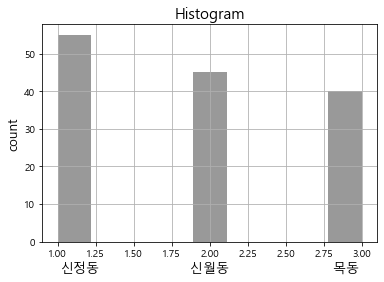

In [17]:
plt.title("Histogram", fontsize=15)
frq, bins, fig = plt.hist(df['label'], bins=9, alpha=.8, color='grey')
plt.ylabel("count", fontsize=13)
plt.xlabel("신정동　　　　　　　신월동　　　　　　　　목동", fontsize=13)
plt.grid()
plt.show()

No handles with labels found to put in legend.


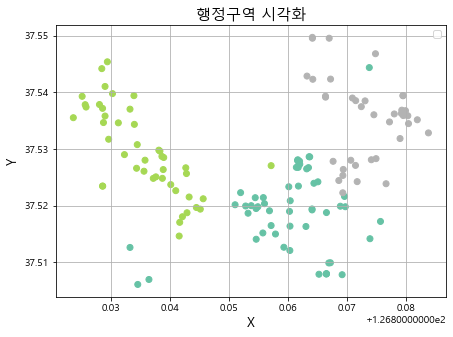

In [18]:
plt.figure(figsize=(7,5))
plt.title("행정구역 시각화", fontsize=15)
plt.scatter(df["X"], df["Y"], c=df["label"], cmap='Set2', alpha=1.0)
plt.xlabel("X", fontsize=13)
plt.ylabel("Y", fontsize=13)
plt.grid()
plt.legend()
plt.show()

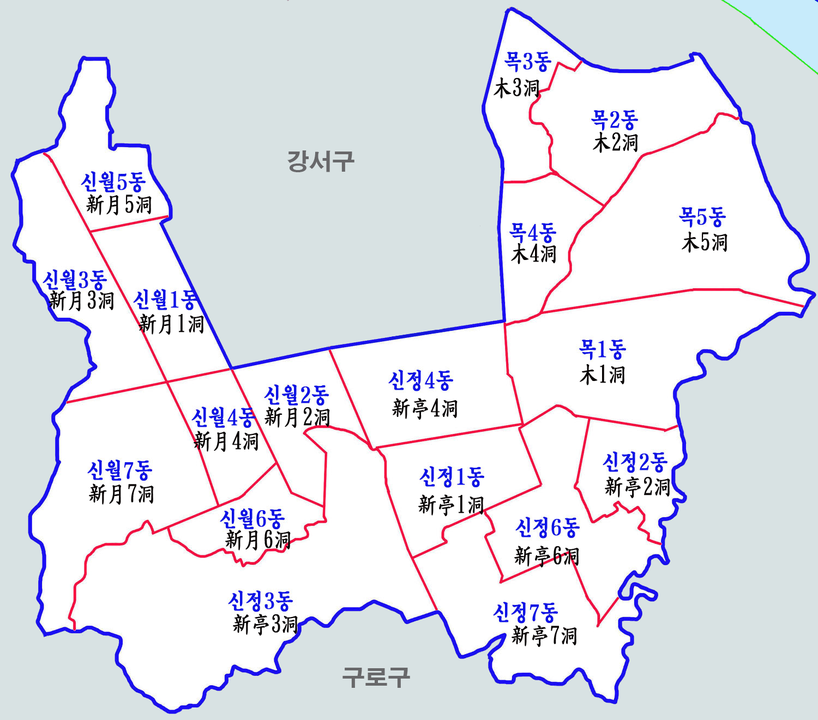

In [19]:
Image('image/양천구청.png') # 46 89 140

## Heapq 함수로 2차원리스트 만들고 데이터 셋 정의
- 이진 트리(binary tree) 기반의 최소 힙(min heap) 자료구조를 제공

In [20]:
dataset = []

In [21]:
df

,단속장소,X,Y,단속건수,number,dis,xy,label
0,서울특별시 양천구 신월3동 신원초교,126.829355,37.545372,83,0,0.000000,"(126.8293552, 37.54537221)",2
1,서울특별시 양천구 신월동 수명산롯데캐슬아파트,126.828413,37.544168,44,1,132.000370,"(126.828413, 37.5441675)",2
2,서울특별시 양천구 신월동 신월중학교,126.828963,37.541024,91,2,293.100568,"(126.828963, 37.5410238)",2
3,서울특별시 양천구 신월동 강서경찰서,126.830222,37.539764,98,3,386.026828,"(126.830222, 37.5397642)",2
4,서울특별시 양천구 신월동 273,126.828015,37.537837,46,4,523.919738,"(126.8280149, 37.53783654)",2
...,...,...,...,...,...,...,...,...
135,서울특별시 양천구 목3동 보미진온누리약국,126.864092,37.549530,118,135,483.127268,"(126.864092, 37.5495302)",3
136,서울특별시 양천구 목동 보미진온누리약국,126.864081,37.549686,103,136,493.517662,"(126.8640815, 37.54968571)",3
137,서울특별시 양천구 목동 목동대우마이빌,126.866933,37.549534,177,137,573.649249,"(126.866933, 37.5495335)",3
138,서울특별시 양천구 신정3동 목동메디컬복합센터,126.873726,37.544353,167,138,1073.193345,"(126.8737257, 37.54435342)",1


In [22]:
# x좌표, y좌표, label 넣어주기
for i in range(len(df)):
    heapq.heappush(dataset,[df['X'][i],df['Y'][i],df['label'][i]])

In [23]:
dataset

[[126.82359, 37.5355108, 2],
 [126.825086, 37.5392792, 2],
 [126.8280149, 37.53783654, 2],
 [126.825599, 37.5378113, 2],
 [126.825747, 37.5373881, 2],
 [126.8285365, 37.52345084, 2],
 [126.828542, 37.5371579, 2],
 [126.828964, 37.5358071, 2],
 [126.832249, 37.5290003, 2],
 [126.8293552, 37.54537221, 2],
 [126.828413, 37.5441675, 2],
 [126.828695, 37.5346534, 2],
 [126.8285687, 37.52343383, 2],
 [126.831214, 37.53460308, 2],
 [126.8339301, 37.53433533, 2],
 [126.830222, 37.5397642, 2],
 [126.829573, 37.5317084, 2],
 [126.834418, 37.5307603, 2],
 [126.8331915, 37.51261864, 1],
 [126.835736, 37.5280141, 2],
 [126.834302, 37.5265885, 2],
 [126.838074, 37.5297833, 2],
 [126.8345058, 37.50609039, 1],
 [126.835559, 37.5260677, 2],
 [126.8331897, 37.53701776, 2],
 [126.828963, 37.5410238, 2],
 [126.838597, 37.5286848, 2],
 [126.838903, 37.528487, 2],
 [126.8371343, 37.52480516, 2],
 [126.8375704, 37.52507481, 2],
 [126.838817, 37.5263606, 2],
 [126.8386742, 37.52481136, 2],
 [126.8400952, 37.5

# KNN 알고리즘 적용해보기
(참고사이트) : https://firework-ham.tistory.com/27

    * 거리 계산하기
    * 가장 근처에 있는 요소 뽑기
    * 예측하기
    

### < 1단계 > 거리 계산하기 (유클리드 거리 사용)

In [24]:
def euclidean_distance(row1,row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

In [25]:
df_label_1 = df[df['label']==1]

In [26]:
# label1  X의 중심 좌표
sum(df_label_1['X'])/len(df_label_1['X'])

126.8603237927273

In [27]:
# label1 Y의 중심 좌표
sum(df_label_1['Y'])/len(df_label_1['Y'])

37.51922251945455

In [28]:
row0 = [126.8603237927273,37.51922251945455]
for row in dataset:
    distance = euclidean_distance(row0, row)
    print(distance)

0.03673379272730415
0.0352377927273011
0.03230889272730053
0.03472479272730311
0.03457679272729308
0.03178729272730152
0.031781792727301195
0.03135979272730083
0.028074792727295517
0.030968592727305122
0.03191079272730235
0.03162879272730379
0.03175509272729471
0.02910979272729719
0.026393692727296525
0.03010179272729374
0.030750792727303633
0.025905792727300536
0.027132292727301888
0.024587792727302826
0.026021792727306092
0.022249792727293993
0.02581799272729768
0.02476479272729648
0.0271340927272945
0.0313607927272983
0.021726792727307043
0.02142079272729802
0.023189492727297534
0.022753392727295818
0.021506792727294055
0.02164959272730016
0.020228592727306705
0.017683792727297032
0.017569692727306574
0.01938259272729681
0.017118792727302434
0.026468792727300183
0.018253792727293217
0.017476692727299792
0.01871189272729623
0.015890192727297858
0.014736192727298203
0.01880479272729474
0.015224792727295267
0.022066192727294265
0.02392479272729986
0.003226792727303973
0.004548792727305

### < 2단계 > 가장 근처 요소 뽑기

In [29]:
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

In [30]:
neighbors = get_neighbors(dataset, row0, 30)
for neighbor in neighbors:
    print(neighbor)

[126.860333, 37.5208561, 1]
[126.860296, 37.5163781, 1]
[126.86027, 37.5120803, 1]
[126.860212, 37.5189819, 1]
[126.8600909, 37.52332583, 1]
[126.8613709, 37.52675527, 1]
[126.8592545, 37.51265188, 1]
[126.8615749, 37.52794185, 1]
[126.8616107, 37.52808776, 1]
[126.861679, 37.5267412, 1]
[126.861719, 37.5234436, 1]
[126.8617931, 37.52722087, 1]
[126.861915, 37.5278317, 1]
[126.86195, 37.5273002, 1]
[126.857833, 37.5149876, 1]
[126.8629928, 37.51631785, 1]
[126.863117, 37.5264816, 1]
[126.8631719, 37.54285308, 3]
[126.8634243, 37.52670331, 1]
[126.8635331, 37.52862207, 1]
[126.857097, 37.5270511, 2]
[126.857095, 37.5164824, 1]
[126.8636336, 37.52860262, 1]
[126.856818, 37.5190859, 1]
[126.864023, 37.5194099, 1]
[126.864035, 37.5192387, 1]
[126.8640815, 37.54968571, 3]
[126.864092, 37.5495302, 3]
[126.8641541, 37.54228853, 3]
[126.864343, 37.5239422, 1]


### < 3단계 > 예측하기

In [31]:
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    for neighbor in neighbors:
        print(neighbor)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

In [32]:
#row0 = [3,3,0]
row0 =[126.8603237927273,37.51922251945455,1]
prediction = predict_classification(dataset, row0, 3)
print('Expected %d, Got %d.' % (row0[-1], prediction))

[126.860212, 37.5189819, 1]
[126.860333, 37.5208561, 1]
[126.860296, 37.5163781, 1]
Expected 1, Got 1.


In [ ]:
df# 신정동, 신정4동, 신정1동, 신정3동, label = 1 
df.loc[(df['단속장소'].str[10:13] == '신정동') | (df['단속장소'].str[10:13] == '신정4')
       | (df['단속장소'].str[10:13] == '신정1') | (df['단속장소'].str[10:13] == '신정3'),'label'] = 1

In [40]:
df['test'] = 0

In [41]:
df.head()

,단속장소,X,Y,단속건수,number,dis,xy,label,test
0,서울특별시 양천구 신월3동 신원초교,126.829355,37.545372,83,0,0.000000,"(126.8293552, 37.54537221)",2,0
1,서울특별시 양천구 신월동 수명산롯데캐슬아파트,126.828413,37.544168,44,1,132.000370,"(126.828413, 37.5441675)",2,0
2,서울특별시 양천구 신월동 신월중학교,126.828963,37.541024,91,2,293.100568,"(126.828963, 37.5410238)",2,0
3,서울특별시 양천구 신월동 강서경찰서,126.830222,37.539764,98,3,386.026828,"(126.830222, 37.5397642)",2,0
4,서울특별시 양천구 신월동 273,126.828015,37.537837,46,4,523.919738,"(126.8280149, 37.53783654)",2,0


In [44]:
df.loc[(df['number'] <=46),'test'] = 0

In [46]:
df.loc[(df['number'] > 47) & (df['number'] <=89),'test'] = 1

In [47]:
df.loc[(df['number'] > 90) & (df['number'] <=140),'test'] = 2

In [ ]:
# 46 89 140
df.loc[(df['number'])]

In [51]:
df[df['X'] == 126.857097]

,단속장소,X,Y,단속건수,number,dis,xy,label,test
47,서울특별시 양천구 신월동 귀족,126.857097,37.527051,57,47,0.0,"(126.857097, 37.5270511)",2,1


In [50]:
df_0.loc[df_0['X'] == 126.857097,'z'] = 1 